In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow.keras import datasets, layers, models
# Dataset: https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
# the training and testing data are provided as separate entities.That's why tuples are used
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
# 2D to 1D

y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

In [7]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
# 3D array with 32 x 32 with 3 RGB CHANNELS 
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

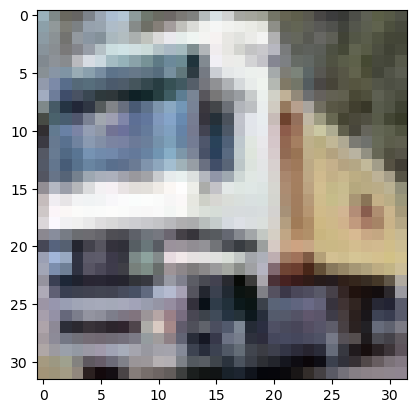

In [10]:
plt.imshow(x_train[1])

In [49]:
def show_image(x,y, index):
    plt.imshow(x[index])
    plt.xlabel(labels[y[index]])

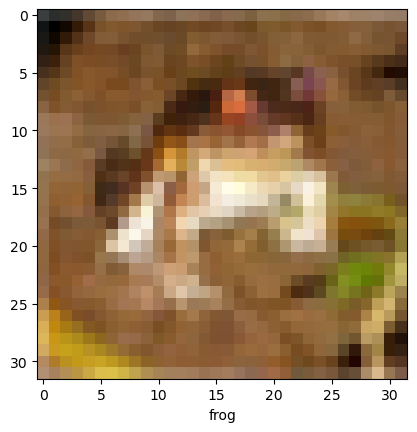

In [54]:
show_image(x_train,y_train, 0)

In [13]:
# Normalize Pixels (0--> 255) to (0-->1)
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [14]:
x_train = x_train/255

In [15]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [16]:
x_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [17]:
x_test = x_test/255

In [18]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

# Training done by using ANN

In [19]:
ann_model = models.Sequential([
    
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(3000, activation = 'sigmoid')
])


ann_model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

C:\Users\tecsh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
ann_model.fit(x_train,y_train, epochs=6)

Epoch 1/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 82ms/step - accuracy: 0.2548 - loss: 2.2699
Epoch 2/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.3952 - loss: 1.7066
Epoch 3/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.4344 - loss: 1.6004
Epoch 4/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.4567 - loss: 1.5340
Epoch 5/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.4776 - loss: 1.4819
Epoch 6/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4950 - loss: 1.4370


In [27]:
ann_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4831 - loss: 1.4758


[1.4829308986663818, 0.47929999232292175]

# Training done by using CNN

In [21]:
cnn_model = models.Sequential([
    # CNN 
    layers.Conv2D(filters=10, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    # Dense Layers
    layers.Flatten(),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(3000, activation = 'softmax')
])

C:\Users\tecsh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
cnn_model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
cnn_model.fit(x_train,y_train,epochs=6)

Epoch 1/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.2268 - loss: 2.3519
Epoch 2/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4031 - loss: 1.6628
Epoch 3/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4806 - loss: 1.4583
Epoch 4/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.5272 - loss: 1.3362
Epoch 5/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.5647 - loss: 1.2371
Epoch 6/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.5959 - loss: 1.1373


In [25]:
cnn_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5829 - loss: 1.1778


[1.1911849975585938, 0.5807999968528748]

In [34]:
y_test = y_test.reshape(-1,)
y_test.shape

(10000,)

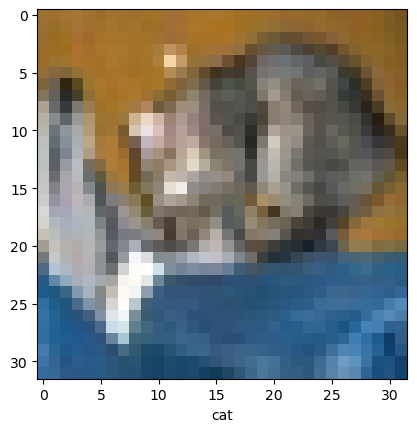

In [55]:
show_image(x_test,y_test,0)

# Manual Model Perfomence

In [58]:
y_predicted[0:5]

array([[1.0271365e-03, 8.6132134e-04, 1.4654789e-02, ..., 1.9727169e-08,
        1.0310537e-08, 1.5153384e-08],
       [8.4812902e-02, 1.4782564e-01, 7.4637443e-05, ..., 1.5751118e-09,
        1.1280524e-09, 1.7351071e-09],
       [1.8610977e-01, 1.4440916e-01, 1.0961926e-03, ..., 6.3197277e-08,
        4.5972044e-08, 6.1555539e-08],
       [3.3772936e-01, 6.0737920e-03, 1.9131593e-02, ..., 6.2172482e-08,
        3.9514561e-08, 6.8957426e-08],
       [3.7430564e-05, 1.7427908e-05, 1.9195754e-02, ..., 1.2360315e-08,
        7.1258892e-09, 7.3463693e-09]], dtype=float32)

In [57]:
y_predicted = cnn_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [62]:
y_predicted[0] # class predictions

array([1.0271365e-03, 8.6132134e-04, 1.4654789e-02, ..., 1.9727169e-08,
       1.0310537e-08, 1.5153384e-08], dtype=float32)

In [61]:
np.argmax(y_predicted[0]) # index of the maximmum value

3

In [72]:
for i in range(5):
    print(np.argmax(y_predicted[i]))

3
8
8
8
4


In [73]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [78]:
labels[3]

'cat'

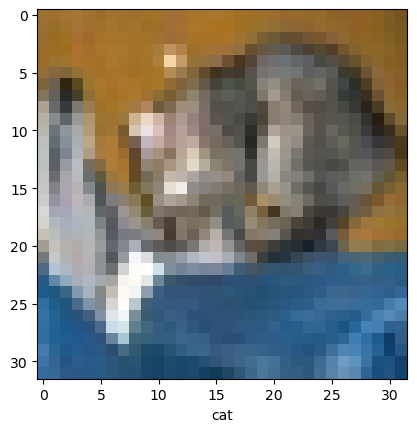

In [82]:
show_image(x_test,y_test,0)